In [1]:
from kan import KAN
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import process as data
import numpy as np

39


In [2]:
ac_p,label=data.deal()
aac=data.fe()
ctd=data.CTD()
gaac=data.gaac()
X=np.concatenate((aac,gaac,ac_p),axis=1)
print(X.shape)

39
(740, 37)


In [3]:
model = KAN(width=[37,5,1], grid=3, k=3)

checkpoint directory created: ./model
saving model version 0.0


In [5]:
y=label
y=np.array(y)
X = X.astype(np.float32)
y = y.astype(np.float32)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)


y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

dataset={}
dataset = {
        'train_input': X_train,
        'test_input': X_test,
        'train_label': y_train,
        'test_label': y_test
    }
    # dataset =torch.from_numpy(dataset)


In [10]:
def train_acc():
    return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

def test_acc():
    return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

# results = model.train(dataset, opt="LBFGS", steps=10, metrics=(train_acc, test_acc))
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

| train_loss: 5.78e-02 | test_loss: 4.66e-01 | reg: 5.83e+01 | : 100%|█| 5/5 [00:01<00:00,  3.39it/s

saving model version 0.4
1.0 0.7837837934494019


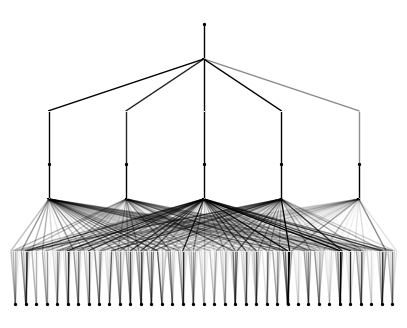

In [11]:
model.plot()

saving model version 0.5


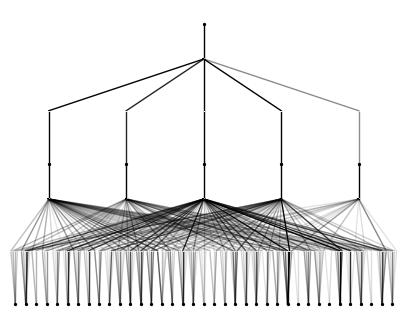

In [12]:
model = model.prune()
model.plot()

In [15]:
results =model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));

| train_loss: 1.28e-01 | test_loss: 3.41e-01 | reg: 4.58e+01 | : 100%|█| 5/5 [00:02<00:00,  2.46it/s

saving model version 0.8


In [21]:
print(results['train_acc'][-1], results['test_acc'][-1])
#prune有效果

0.9879879951477051 0.8648648858070374


In [17]:
model = model.refine(10)

saving model version 0.9


In [18]:
results =model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));

| train_loss: 1.76e-01 | test_loss: 3.31e-01 | reg: 7.00e+01 | : 100%|█| 5/5 [00:04<00:00,  1.18it/s

saving model version 0.10


In [19]:
print(results['train_acc'][-1], results['test_acc'][-1])

0.9879879951477051 0.8648648858070374


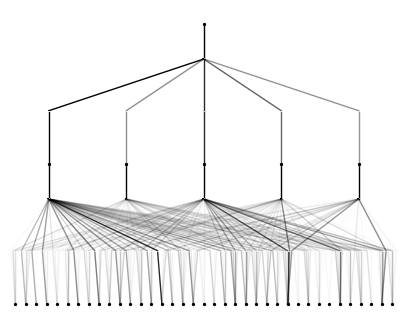

In [20]:
model.plot()

In [22]:
mode = "auto" # "manual"
"""
假设在一个神经网络模型中，坐标 (0,36,4) 可能表示：

层索引 (0): 第一层或第一个处理阶段。
单元索引 (36): 第一层中的第 37 个单元（因为索引从 0 开始）。
通道或特征索引 (4): 第 5 个通道或特征
"""

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.44866421818733215, c=1
fixing (0,0,1) with x, r2=0.7038821578025818, c=1
fixing (0,0,2) with x, r2=0.925186812877655, c=1
fixing (0,0,3) with x, r2=0.8306400179862976, c=1
fixing (0,0,4) with 0
fixing (0,1,0) with x, r2=0.8891578316688538, c=1
fixing (0,1,1) with x, r2=0.5331588387489319, c=1
fixing (0,1,2) with x, r2=3.7329868973756675e-07, c=1
fixing (0,1,3) with x^2, r2=0.9940104484558105, c=2
fixing (0,1,4) with x, r2=0.8246543407440186, c=1
fixing (0,2,0) with x, r2=0.9778256416320801, c=1
fixing (0,2,1) with 0
fixing (0,2,2) with x, r2=0.2260996699333191, c=1
fixing (0,2,3) with 0
fixing (0,2,4) with 0
fixing (0,3,0) with sin, r2=0.9976338148117065, c=2
fixing (0,3,1) with x, r2=0.7180935144424438, c=1
fixing (0,3,2) with x, r2=0.014194819144904613, c=1
fixing (0,3,3) with 0
fixing (0,3,4) with 0
fixing (0,4,0) with x, r2=0.5010416507720947, c=1
fixing (0,4,1) with x^2, r2=0.9899483323097229, c=2
fixing (0,4,2) with x, r2=0.916804850101471, c=1
fixing 

In [23]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

-0.1137*x_1 + 0.02*x_10 + 0.0558*x_11 + 0.046*x_12 + 0.0837*x_13 - 0.0796*x_14 + 0.0624*x_15 - 0.033*x_16 - 0.0725*x_17 - 0.2187*x_18 - 0.033*x_19 + 0.1046*x_2 + 0.0291*x_20 + 0.0992*x_22 - 0.0076*x_23 + 0.1337*x_24 + 0.0703*x_25 - 0.0183*x_26 + 0.0048*x_27 - 0.0579*x_28 - 0.0037*x_29 - 0.0115*x_3 + 0.5235*x_30 - 0.005*x_32 + 0.0012*x_33 + 0.4925*x_34 + 0.0264*x_35 - 0.021*x_37 - 0.022*x_4 - 0.0399*x_5 + 0.1171*x_6 - 0.0433*x_7 - 0.0574*x_8 - 0.0468*x_9 + 0.4348*(0.1 - x_20)**2 - 0.0718*(0.1312 - x_7)**2 + 2.3451*(0.2 - x_16)**4 - 0.0723*(0.2152 - x_5)**2 - 0.1168*(x_17 - 0.2216)**2 - 0.4171*(x_2 - 0.1026)**2 - 0.0261*exp(0.7131*x_33) - 0.0012*sin(10.0*x_16 + 6.6) - 0.0037*sin(5.2736*x_21 - 6.019) + 0.0023*sin(8.2958*x_21 + 1.3621) + 0.0122*sin(10.0*x_21 - 9.6) - 0.005*sin(10.0*x_22 - 10.0) + 0.0364*sin(6.0165*x_23 - 6.0115) - 0.0047*sin(6.8571*x_25 + 5.1838) + 0.0047*sin(4.3547*x_26 - 5.9917) - 0.0126*sin(6.1526*x_26 + 5.9947) + 0.0083*sin(0.9893*x_29 - 0.999) - 0.0056*sin(10.0*x_31 +